# Challenge Set 7 - Alison Glazer
Topic: Challenge Set 7 Subject: Explore MTA turnstile data Date: 10/19/2019 Name: Alison Glazer Worked with: -- Location: https://github.com/alisonglazer/metis_challenges/blob/master/challenge_set_7_alison.ipynb

In [1]:
import sys
print("Python Version:", sys.version)

Python Version: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [124]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
%matplotlib inline


## **CHALLENGE 1**

**Settings: Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.



In [43]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header=None)

In [48]:
# Replace y with 1 and n with 0
df.replace(to_replace=['y','n','?'],value=[1,0,np.nan],inplace=True)

# Fill nans with column mean
df.fillna(value=df.mean(),inplace=True)

## **CHALLENGE 2**

In [57]:
# Set up features and target
y = df[0]
X_cols = np.arange(1,df.shape[1])
X = df[X_cols]

In [59]:
# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=4444, stratify=y)

## **CHALLENGE 3**

In [61]:
# Don't need to scale data using standard scaler since data is all already on the same scale

In [67]:
# Test neighbors
acc_scores = []
for n in range(1,21):
    # Instantiate Model
    knn = KNeighborsClassifier(n_neighbors=n)
    
    # Fit Model
    knn.fit(X_train,y_train);
    
    # Calculate Accuracy Score
    acc_scores.append((n,accuracy_score(y_test,knn.predict(X_test))))


In [71]:
acc_scores

[(1, 0.9389312977099237),
 (2, 0.9389312977099237),
 (3, 0.9541984732824428),
 (4, 0.9465648854961832),
 (5, 0.9618320610687023),
 (6, 0.9465648854961832),
 (7, 0.9465648854961832),
 (8, 0.9312977099236641),
 (9, 0.9541984732824428),
 (10, 0.9541984732824428),
 (11, 0.9541984732824428),
 (12, 0.9541984732824428),
 (13, 0.9541984732824428),
 (14, 0.9465648854961832),
 (15, 0.9541984732824428),
 (16, 0.9541984732824428),
 (17, 0.9541984732824428),
 (18, 0.9465648854961832),
 (19, 0.9541984732824428),
 (20, 0.9465648854961832)]

In [82]:
print('(K value, max accuracy) = ',max(acc_scores, key = lambda i : i[1]))

(K value, max accuracy) =  (5, 0.9618320610687023)


## **CHALLENGE 4**

In [84]:
# Instantiate model
logreg = LogisticRegression(C=10,solver='lbfgs')

# Fit model to the training data
logreg.fit(X_train,y_train);

In [117]:
# Calculate Accuracy
logregacc = accuracy_score(y_test,logreg.predict(X_test))
logregacc

0.9694656488549618

## **CHALLENGE 5**

democrat      267
republican    168
Name: 0, dtype: int64

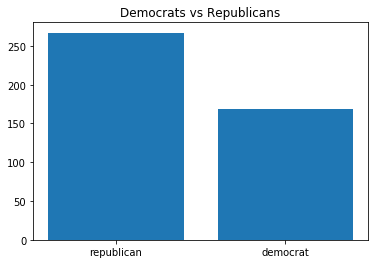

In [98]:
plt.bar(df[0].unique(),height=df[0].value_counts())
plt.title('Democrats vs Republicans');
df[0].value_counts()

In [102]:
silly_dem_predictor = ['democrat']*len(X_test)
silly_rep_predictor = ['republican']*len(X_test)
print('Accuracy of "democrat" predictor: ',accuracy_score(y_test,silly_dem_predictor))
print('Accuracy of "republican" predictor: ',accuracy_score(y_test,silly_rep_predictor))

Accuracy of "democrat" predictor:  0.6106870229007634
Accuracy of "republican" predictor:  0.3893129770992366


## **CHALLENGE 6**

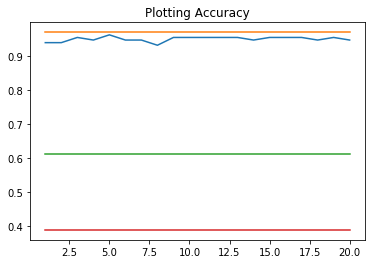

In [126]:
plt.plot(*zip(*acc_scores))
plt.plot([1,20],[logregacc, logregacc])
plt.plot([1,20],[accuracy_score(y_test,silly_dem_predictor),accuracy_score(y_test,silly_dem_predictor)])
plt.plot([1,20],[accuracy_score(y_test,silly_rep_predictor),accuracy_score(y_test,silly_rep_predictor)]);
plt.title('Plotting Accuracy');

## **CHALLENGE 7**

In [160]:
# Log reg learning_curve
m,train_err,test_err = learning_curve(LogisticRegression(solver='lbfgs'),X,y,cv=5)

In [161]:
mean_train_err = [np.mean(x) for x in train_err]
mean_test_err = [np.mean(x) for x in test_err]

In [162]:
# KNN learning curve
m_knn, train_err_knn, test_err_knn = learning_curve(KNeighborsClassifier(n_neighbors=5),X,y,cv=5)

In [163]:
mean_train_err_knn = [np.mean(x) for x in train_err_knn]
mean_test_err_knn = [np.mean(x) for x in test_err_knn]

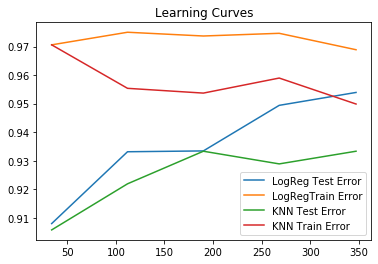

In [164]:
plt.plot(m,mean_test_err)
plt.plot(m,mean_train_err)
plt.plot(m,mean_test_err_knn)
plt.plot(m,mean_train_err_knn)
plt.legend(['LogReg Test Error','LogRegTrain Error','KNN Test Error','KNN Train Error'])
plt.title('Learning Curves');

## **CHALLENGE 8**

In [165]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [170]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('GaussianNB Accuracy = {:5f}'.format(accuracy_score(y_test,gnb.predict(X_test))))

svc = SVC()
svc.fit(X_train,y_train)
print('Support Vector Machine Accuracy = {:5f}'.format(accuracy_score(y_test,gnb.predict(X_test))))

dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)
print('Decision Tree Accuracy = {:5f}'.format(accuracy_score(y_test,dectree.predict(X_test))))

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print('Random Forest Accuracy = {:5f}'.format(accuracy_score(y_test,rf.predict(X_test))))

GaussianNB Accuracy = 0.916031
Support Vector Machine Accuracy = 0.916031
Decision Tree Accuracy = 0.938931
Random Forest Accuracy = 0.938931


/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## **CHALLENGE 9**

In [172]:
from sklearn.model_selection import cross_val_score

In [187]:
cv_logreg = np.mean(cross_val_score(LogisticRegression(solver='lbfgs'),X,y,scoring='accuracy',cv=5))
cv_knn = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=5),X,y,scoring='accuracy',cv=5))
cv_gnb = np.mean(cross_val_score(GaussianNB(),X,y,scoring='accuracy',cv=5))
cv_svc = np.mean(cross_val_score(SVC(),X,y,scoring='accuracy',cv=5))
cv_dt = np.mean(cross_val_score(DecisionTreeClassifier(),X,y,scoring='accuracy',cv=5))
cv_rf = np.mean(cross_val_score(RandomForestClassifier(),X,y,scoring='accuracy',cv=5))

print('logreg accuracy: {:5f}'.format(cv_logreg))
print('knn accuracy: {:5f}'.format(cv_knn))
print('GaussianNB accuracy: {:5f}'.format(cv_gnb))
print('Support Vector accuracy: {:5f}'.format(cv_svc))
print('Decision Tree accuracy: {:5f}'.format(cv_dt))
print('Random Forest accuracy: {:5f}'.format(cv_rf))

logreg accuracy: 0.953912
knn accuracy: 0.933326
GaussianNB accuracy: 0.940144
Support Vector accuracy: 0.953965
Decision Tree accuracy: 0.935492
Random Forest accuracy: 0.960731


/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/

## **CHALLENGE 10**

In [225]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header=None)

# Replace y with 1 and n with 0
df.replace(to_replace=['y','n','?'],value=[1,0,np.nan],inplace=True)

# Fill nans with column mean
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [226]:
# Set up features and target
y = df[1]
X_cols = np.arange(2,df.shape[1])
X = df[X_cols]

In [228]:
cv_logreg = np.mean(cross_val_score(LogisticRegression(solver='lbfgs'),X,y,scoring='accuracy',cv=5))
cv_knn = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=5),X,y,scoring='accuracy',cv=5))
print('logreg accuracy: {:5f}'.format(cv_logreg))
print('knn accuracy: {:5f}'.format(cv_knn))

logreg accuracy: 0.666525
knn accuracy: 0.650510


## **CHALLENGE 11**

In [229]:
df = pd.read_csv('challenges_data/2013_movies.csv')

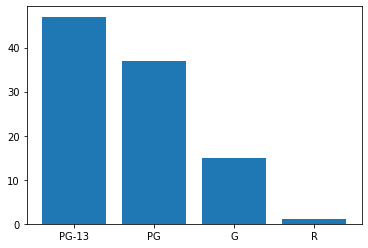

In [234]:
plt.bar(df.Rating.unique(),df.Rating.value_counts());

In [283]:
df.ReleaseDate = pd.to_datetime(df.ReleaseDate)
df['month'] = df.ReleaseDate.map(lambda x: x.month)

df.Budget.fillna(df.Budget.mean(),inplace=True)

In [297]:
df['RuntimeCat'] = df.Runtime
df.RuntimeCat[df.Runtime>100] = 1
df.RuntimeCat[df.Runtime<=100] = 0

/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [298]:
y=df['RuntimeCat']
X_cols = ['Budget','DomesticTotalGross','month']
X = df[X_cols]

In [311]:
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=4444,stratify=y)

scaler = StandardScaler()


# Fit the scaler using the training data and scale it
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values),
                              columns=X.columns)

# Scale the test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train_scaled,y_train)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
print('Dummy accuracy: {}'.format(accuracy_score(y_test,[1]*len(X_test))))
print('LogReg accuracy: {}'.format(accuracy_score(y_test,lr.predict(X_test_scaled))))
print('KNN accuracy: {}'.format(accuracy_score(y_test,knn.predict(X_test_scaled))))

Dummy accuracy: 0.7
LogReg accuracy: 0.7
KNN accuracy: 0.6333333333333333


In [305]:
list(zip(X_cols,lr.coef_[0]))

[('Budget', 4.685725396943777e-09),
 ('DomesticTotalGross', 2.7906683084471867e-09),
 ('month', 3.794769507711822e-15)]

## **CHALLENGE 12**

In [312]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None)

In [314]:
df

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [316]:
# What is the average and standard deviation of the age of all of the patients? 
print('mean age = ',np.mean(df[0]))
print('standard deviation age = ',np.std(df[0]))

mean age =  52.45751633986928
standard deviation age =  10.785785203631832


In [320]:
# What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
survivedf = df[df[3]==1]
print('mean age = ',np.mean(survivedf[0]))
print('standard deviation age = ',np.std(survivedf[0]))

mean age =  52.01777777777778
standard deviation age =  10.987655475100508


In [322]:
# What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
notsurvivedf = df[df[3]==2]
print('mean age = ',np.mean(notsurvivedf[0]))
print('standard deviation age = ',np.std(notsurvivedf[0]))

mean age =  53.67901234567901
standard deviation age =  10.104182193031312


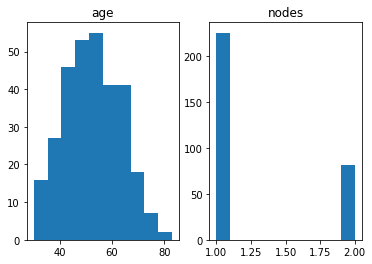

In [326]:
# Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
plt.subplot(1,2,1)
plt.hist(df[0])
plt.title('age')
plt.subplot(1,2,2)
plt.hist(df[3])
plt.title('nodes');

In [327]:
# What is the earliest year of surgery in this dataset?
df[1].min()

58

In [329]:
# What is the most recent year of surgery?
df[1].max()

69

In [352]:
# Use logistic regression to predict survival after 5 years. How well does your model do?
# 1 = survival
df[3].replace(to_replace=2,value=0,inplace=True)

X=df.loc[:,0:2]
y=df[3]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=3,random_state=4444,stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

lr=LogisticRegression(solver='lbfgs')
lr.fit(X_train_scaled,y_train)
accuracy_score(y_test,lr.predict(X_test_scaled))

0.6666666666666666

In [353]:
# What are the coefficients of logistic regression? Which features affect the outcome how?

list(zip(X.columns,lr.coef_[0]))

[(0, -0.2022821505090282), (1, 0.013922586759890531), (2, -0.6222485351971992)]

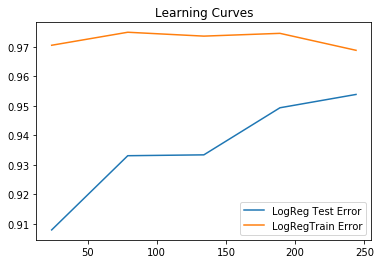

In [354]:
# Draw the learning curve for logistic regression in this case.
m,train_err,test_err = learning_curve(LogisticRegression(solver='lbfgs'),X,y,cv=5)
plt.plot(m,mean_test_err)
plt.plot(m,mean_train_err)
plt.legend(['LogReg Test Error','LogRegTrain Error'])
plt.title('Learning Curves');